In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

In [5]:
path = "/home/carol/NaroNet-main/EXP3/ConcInpCol.npy"
print(np.shape(np.load(path)))

(3847875, 265)


## PCA

In [2]:
def reduce_plot_clusters(data, n_clusters=10, random_state=42):
    # Step 1: Reduce dimensionality to 2
    pca = PCA(n_components=2, random_state=random_state)
    reduced_data = pca.fit_transform(data)
    
    # Step 2: Train KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(reduced_data)
    
    # Step 3: Plot the data in 2D
    plt.figure(figsize=(10, 8))
    
    # Scatter plot of the reduced data
    colors = plt.cm.tab10(np.arange(n_clusters) / n_clusters)  # Using tab10 colormap
    cluster_scatters = []
    for i in range(n_clusters):
        cluster_data = reduced_data[kmeans.labels_ == i]
        scatter = plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=1, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)
        cluster_scatters.append(scatter)
    
    # Highlight the centroids
    centroids = kmeans.cluster_centers_
    centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], s=50, marker='X', c='black', label='Centroids')
    
    # Create custom legends
    # Customizing the marker size in the legend for the centroids
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', 
                              markerfacecolor=colors[i], markersize=5, alpha=0.6) for i in range(n_clusters)]
    legend_elements.append(Line2D([0], [0], marker='X', color='w', label='Centroids',
                                   markerfacecolor='black', markersize=5))  # Smaller 'X' for legend
    
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('2D Visualization of Clusters')
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

/home/carol/anaconda3/envs/anotherone/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


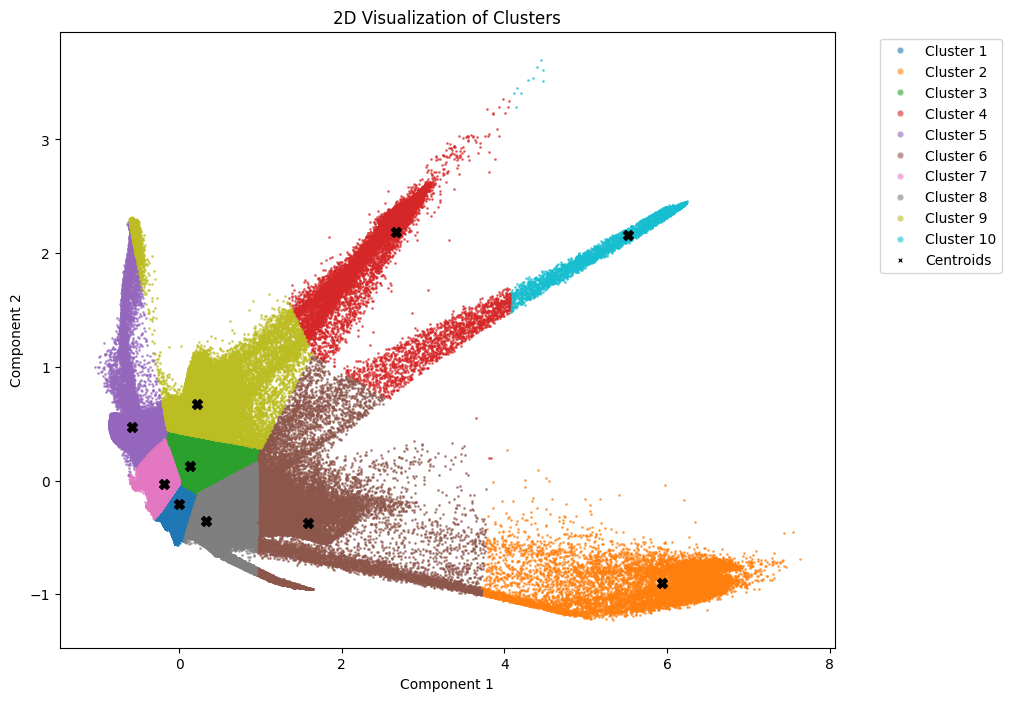

In [3]:
path = "/home/carol/NaroNet-main/EXP3/IDEC-toy/results/embs/reconstructed_x.npy"
data = np.load(path)
reduce_plot_clusters(data)

/home/carol/anaconda3/envs/anotherone/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


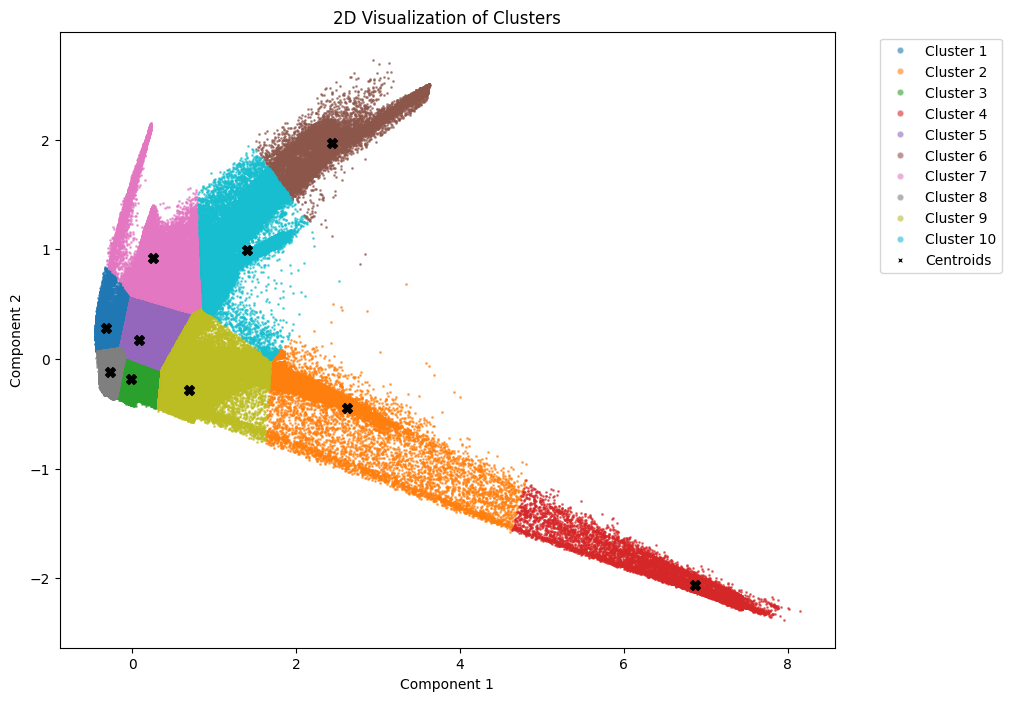

In [4]:
path = "/home/carol/NaroNet-main/EXP3/ConcInpCol.npy"
data = np.load(path)
reduce_plot_clusters(data)

## Cluster Analysis

In [2]:
def kmeans_clustering_analysis(data, n_clusters=10, random_state=42):
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(data)

    # The total inertia (sum of squared distances to the closest centroid)
    total_distance = kmeans.inertia_
    print(f"Total distance from instances to centroids: {total_distance}")

    # Find the cluster centers
    centroids = kmeans.cluster_centers_

    # Assign each instance to its closest centroid and calculate the distance
    distances = np.min(euclidean_distances(data, centroids), axis=1)

    # Plot boxplots for distances to centroids for each cluster
    plt.figure(figsize=(10, 6))
    plt.boxplot([distances[kmeans.labels_ == i] for i in range(n_clusters)])
    plt.xlabel('Cluster Index')
    plt.ylabel('Distance to Centroid')
    plt.title('Distances from Instances to Centroids for Each Cluster')
    plt.show()

    # Count the number of instances assigned to each cluster
    cluster_counts = np.bincount(kmeans.labels_)
    for cluster_index, count in enumerate(cluster_counts):
        print(f"Cluster {cluster_index}: {count} instances")

    # Compute pairwise distances between centroids
    centroid_distances = euclidean_distances(centroids)
    print("Distances between centroids:")
    print(centroid_distances)

    print(total_distance)
    return 

/home/carol/anaconda3/envs/anotherone/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total distance from instances to centroids: 3820077.757822588


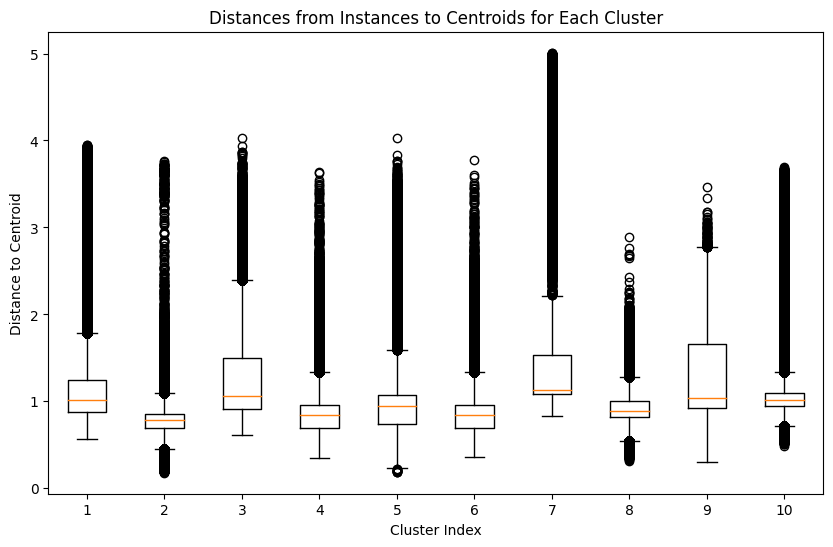

Cluster 0: 319268 instances
Cluster 1: 114925 instances
Cluster 2: 207717 instances
Cluster 3: 1282666 instances
Cluster 4: 16442 instances
Cluster 5: 1282897 instances
Cluster 6: 33277 instances
Cluster 7: 401344 instances
Cluster 8: 31166 instances
Cluster 9: 158173 instances
Distances between centroids:
[[0.         1.54134152 1.3707505  0.92546692 7.20522661 0.92396998
  3.22894959 1.11181756 3.15200845 1.36497111]
 [1.54134152 0.         1.8847313  1.3960956  7.23942602 1.39510964
  3.44046885 1.4861658  3.66581297 1.67116259]
 [1.3707505  1.8847313  0.         1.36380345 6.6746388  1.36393418
  3.34134848 1.61608909 3.00062368 1.72323491]
 [0.92546692 1.3960956  1.36380345 0.         7.34321212 0.50764543
  3.40645499 0.81717766 3.4074519  1.29701859]
 [7.20522661 7.23942602 6.6746388  7.34321212 0.         7.34220657
  6.55931168 7.41869262 6.85085401 7.25629191]
 [0.92396998 1.39510964 1.36393418 0.50764543 7.34220657 0.
  3.4045772  0.81852975 3.40634163 1.29725579]
 [3.228949

In [3]:
path="/home/carol/NaroNet-main/EXP3/ConcInpCol.npy"
x = np.load(path)
kmeans_clustering_analysis(x)

/home/carol/anaconda3/envs/anotherone/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total distance from instances to centroids: 1313323.375


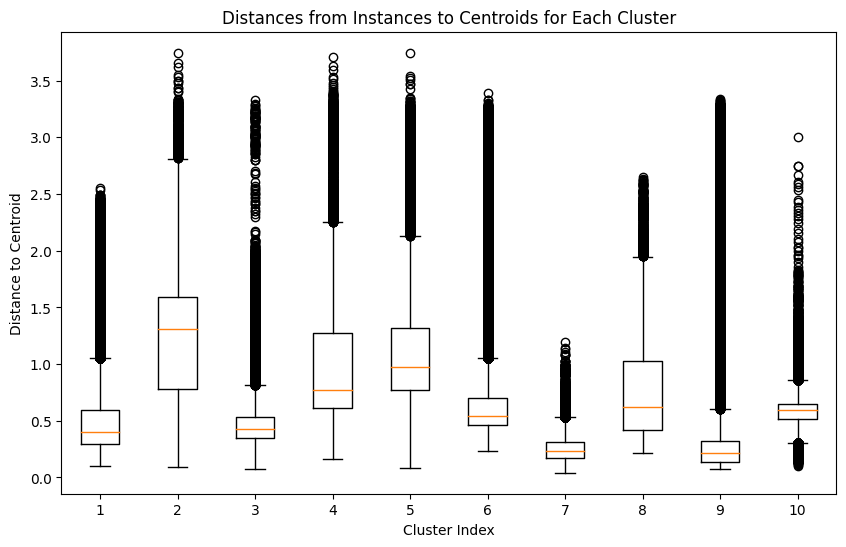

Cluster 0: 2538701 instances
Cluster 1: 5911 instances
Cluster 2: 26752 instances
Cluster 3: 28878 instances
Cluster 4: 15714 instances
Cluster 5: 474455 instances
Cluster 6: 216530 instances
Cluster 7: 244826 instances
Cluster 8: 176052 instances
Cluster 9: 120056 instances
Distances between centroids:
[[0.        6.9799194 3.8898351 2.5872567 6.5971413 0.8644327 1.2340761
  1.0793574 1.0391365 1.5337685]
 [6.9799194 0.        5.463189  6.017499  6.8558283 6.811731  7.308394
  6.850325  7.231826  7.130438 ]
 [3.8898351 5.463189  0.        4.0213723 5.9308467 3.7932348 4.35263
  3.499927  3.9524002 4.082396 ]
 [2.5872567 6.017499  4.0213723 0.        5.92249   2.520342  3.068852
  2.6195748 3.050303  3.1253648]
 [6.5971413 6.8558283 5.9308467 5.92249   0.        6.244268  6.9978685
  6.457998  6.9702864 6.626473 ]
 [0.8644327 6.811731  3.7932348 2.520342  6.244268  0.        1.6677791
  1.3241678 1.4357567 1.67417  ]
 [1.2340761 7.308394  4.35263   3.068852  6.9978685 1.6677791 0.
  1.

In [4]:
path = "/home/carol/NaroNet-main/EXP3/IDEC-toy/results/embs/reconstructed_x.npy"
recx = np.load(path)
kmeans_clustering_analysis(recx)

In [10]:
path = "/home/carol/NaroNet-main/EXP3/IDEC-toy/ypred2.npy"

# Your numpy array with numbers from 1 to 10
arr = np.load(path)

# Since numpy's bincount starts counting from 0, we'll adjust the array
# to make sure it starts from 1
count = np.bincount(arr)

# Printing the counts for each class (1 to 10)
for i, c in enumerate(count, start=1):
    print(f"Class {i-1}: {c} values")


Class 0: 137726 values
Class 1: 901238 values
Class 2: 290341 values
Class 3: 387513 values
Class 4: 336560 values
Class 5: 283535 values
Class 6: 209343 values
Class 7: 241150 values
Class 8: 548155 values
Class 9: 512314 values


/home/carol/anaconda3/envs/anotherone/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/carol/anaconda3/envs/anotherone/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


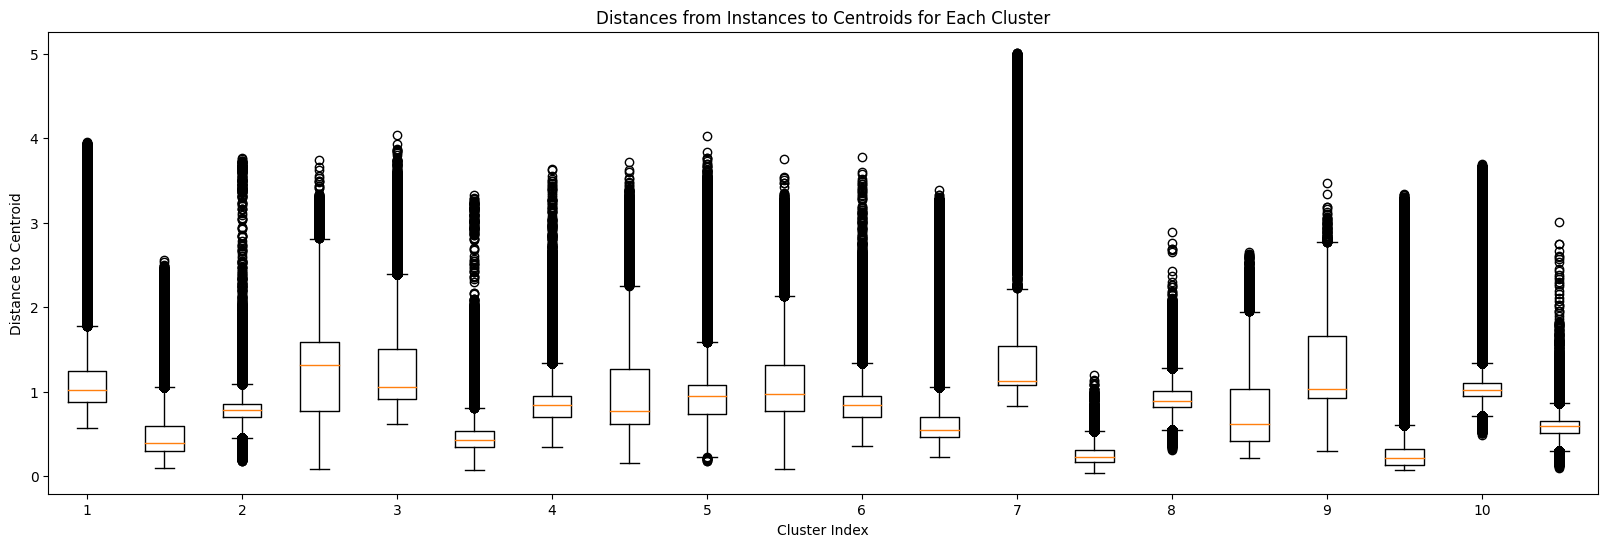

In [4]:
def kmeans_clustering_analysis2(data1, data2, n_clusters=10, random_state=42):
    # Function to fit KMeans and calculate distances to centroids
    def fit_and_distance(data):
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(data)
        centroids = kmeans.cluster_centers_
        distances = np.min(euclidean_distances(data, centroids), axis=1)
        return distances, kmeans.labels_, centroids

    # Fit KMeans and calculate distances for both datasets
    distances1, labels1, centroids1 = fit_and_distance(data1)
    distances2, labels2, centroids2 = fit_and_distance(data2)

    # Plotting
    plt.figure(figsize=(20, 6))

    # Boxplot for distances to centroids for each cluster for both datasets
    data_to_plot = []
    for i in range(n_clusters):
        data_to_plot.append(distances1[labels1 == i])
        data_to_plot.append(distances2[labels2 == i])

    plt.boxplot(data_to_plot)
    plt.xlabel('Cluster Index')
    plt.ylabel('Distance to Centroid')
    plt.title('Distances from Instances to Centroids for Each Cluster')
    plt.xticks(np.arange(1, 2*n_clusters+1, 2), np.arange(1, n_clusters+1))
    plt.show()

path = "/home/carol/NaroNet-main/EXP3/IDEC-toy/results/embs/reconstructed_x.npy"
recx = np.load(path)
path="/home/carol/NaroNet-main/EXP3/ConcInpCol.npy"
x = np.load(path)
kmeans_clustering_analysis2(x,recx)

## Figures

In [9]:
# Define the matrix
inp = np.array([[0.         , 1.54134152, 1.3707505 , 0.92546692, 7.20522661, 0.92396998, 3.22894959, 1.11181756, 3.15200845, 1.36497111],
                  [1.54134152, 0.         , 1.8847313 , 1.3960956 , 7.23942602, 1.39510964, 3.44046885, 1.4861658 , 3.66581297, 1.67116259],
                  [1.3707505 , 1.8847313 , 0.         , 1.36380345, 6.6746388 , 1.36393418, 3.34134848, 1.61608909, 3.00062368, 1.72323491],
                  [0.92546692, 1.3960956 , 1.36380345, 0.         , 7.34321212, 0.50764543, 3.40645499, 0.81717766, 3.4074519 , 1.29701859],
                  [7.20522661, 7.23942602, 6.6746388 , 7.34321212, 0.         , 7.34220657, 6.55931168, 7.41869262, 6.85085401, 7.25629191],
                  [0.92396998, 1.39510964, 1.36393418, 0.50764543, 7.34220657, 0.         , 3.4045772 , 0.81852975, 3.40634163, 1.29725579],
                  [3.22894959, 3.44046885, 3.34134848, 3.40645499, 6.55931168, 3.4045772 , 0.         , 3.29861684, 3.71315736, 3.5301917 ],
                  [1.11181756, 1.4861658 , 1.61608909, 0.81717766, 7.41869262, 0.81852975, 3.29861684, 0.         , 3.5002197 , 1.18576569],
                  [3.15200845, 3.66581297, 3.00062368, 3.4074519 , 6.85085401, 3.40634163, 3.71315736, 3.5002197 , 0.         , 3.22349964],
                  [1.36497111, 1.67116259, 1.72323491, 1.29701859, 7.25629191, 1.29725579, 3.5301917 , 1.18576569, 3.22349964, 0.        ]])

def heatplot(data):
    # Create the heatmap
    plt.figure(figsize=(10, 10))  # Adjusted figsize to match the dimensions of the matrix
    plt.imshow(data, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Heatmap of Matrix')
    plt.show()

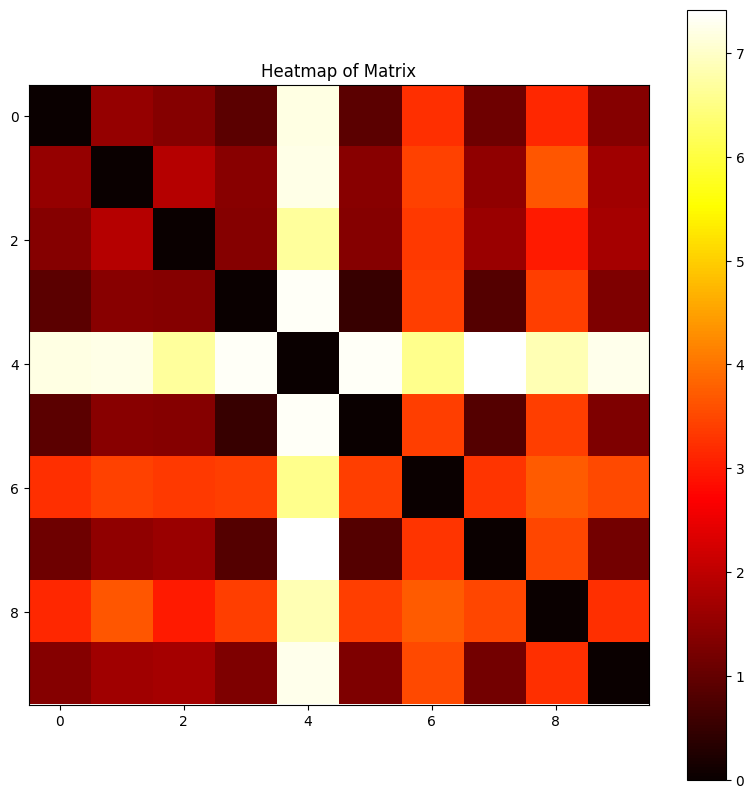

In [10]:
heatplot(inp)

In [11]:
outp = [[0.        , 6.9799194, 3.8898351, 2.5872567, 6.5971413, 0.8644327, 1.2340761, 1.0793574, 1.0391365, 1.5337685],
        [6.9799194, 0.        , 5.463189 , 6.017499 , 6.8558283, 6.811731 , 7.308394 , 6.850325 , 7.231826 , 7.130438 ],
        [3.8898351, 5.463189 , 0.        , 4.0213723, 5.9308467, 3.7932348, 4.35263  , 3.499927 , 3.9524002, 4.082396 ],
        [2.5872567, 6.017499 , 4.0213723, 0.        , 5.92249  , 2.520342 , 3.068852 , 2.6195748, 3.050303 , 3.1253648],
        [6.5971413, 6.8558283, 5.9308467, 5.92249  , 0.        , 6.244268 , 6.9978685, 6.457998 , 6.9702864, 6.626473 ],
        [0.8644327, 6.811731 , 3.7932348, 2.520342 , 6.244268 , 0.        , 1.6677791, 1.3241678, 1.4357567, 1.67417  ],
        [1.2340761, 7.308394 , 4.35263  , 3.068852 , 6.9978685, 1.6677791, 0.       , 1.5464458, 1.161021 , 1.8847384],
        [1.0793574, 6.850325 , 3.499927 , 2.6195748, 6.457998 , 1.3241678, 1.5464458, 0.       , 1.3391662, 1.8803122],
        [1.0391365, 7.231826 , 3.9524002, 3.050303 , 6.9702864, 1.4357567, 1.161021 , 1.3391662, 0.       , 1.5709099],
        [1.5337685, 7.130438 , 4.082396 , 3.1253648, 6.626473 , 1.67417  , 1.8847384, 1.8803122, 1.5709099, 0.       ]]

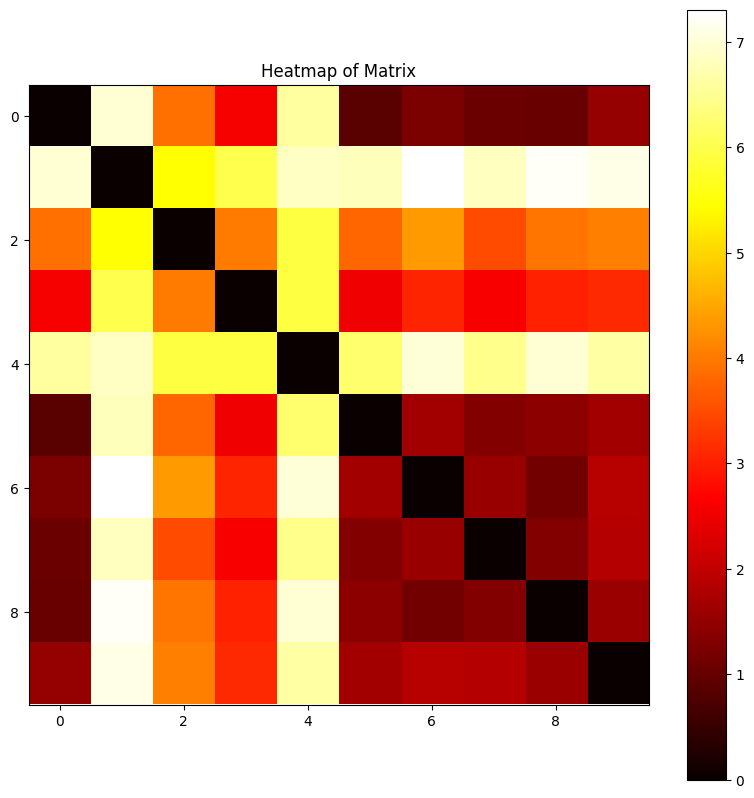

In [12]:
heatplot(outp)

Histogram class distribution

In [5]:
def class_distr(instances):
    clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9']
    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.bar(clusters, instances, color='skyblue')
    plt.xlabel('Clusters')
    plt.ylabel('Number of Instances')
    plt.title('Distribution of Instances in Clusters')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

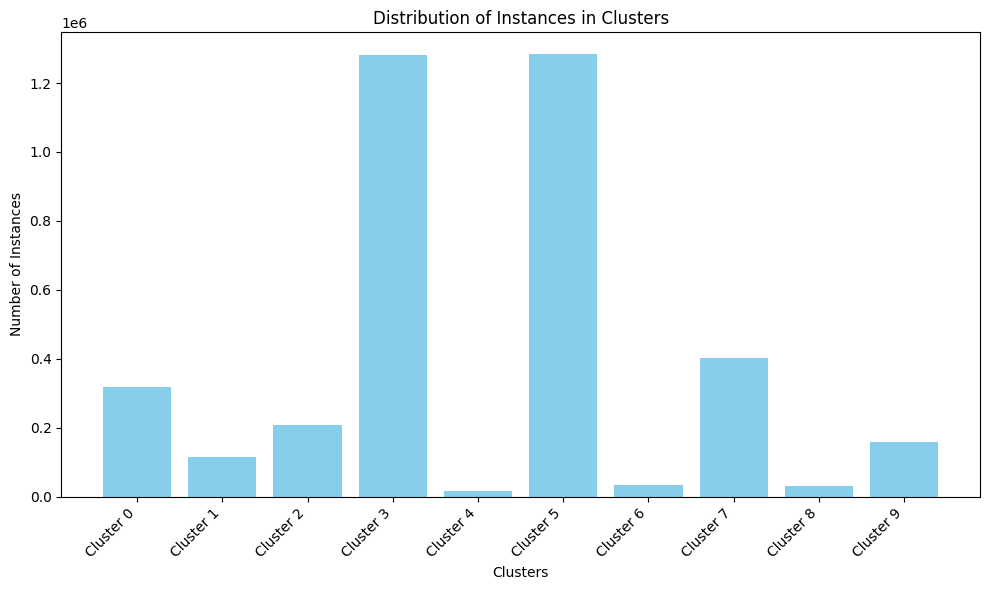

In [12]:
instances1 = [319268, 114925, 207717, 1282666, 16442, 1282897, 33277, 401344, 31166, 158173]
class_distr(instances1)

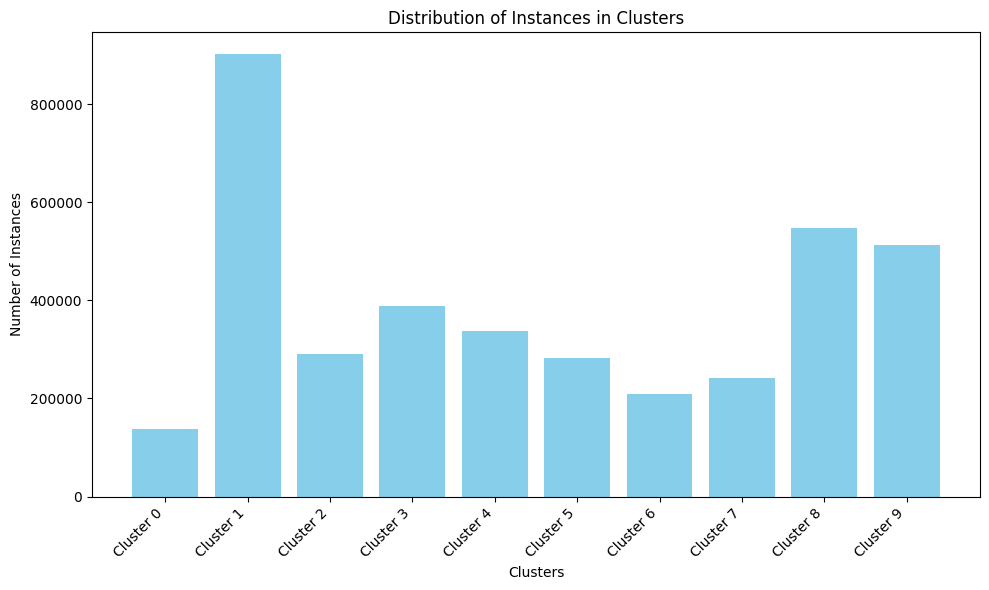

In [11]:
#AE latent space
instances2 = [137726, 901238, 290341, 387513, 336560, 283535, 209343, 241150, 548155, 512314] 
class_distr(instances2)

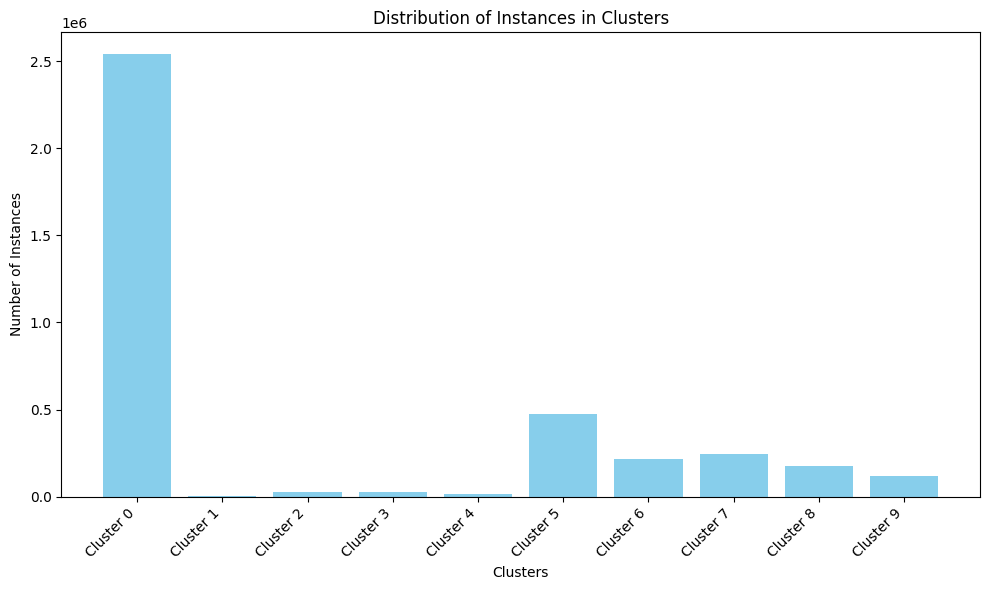

In [7]:
#rec
instances3 = [2538701, 5911, 26752, 28878, 15714, 474455, 216530, 244826, 176052, 120056]
class_distr(instances3)

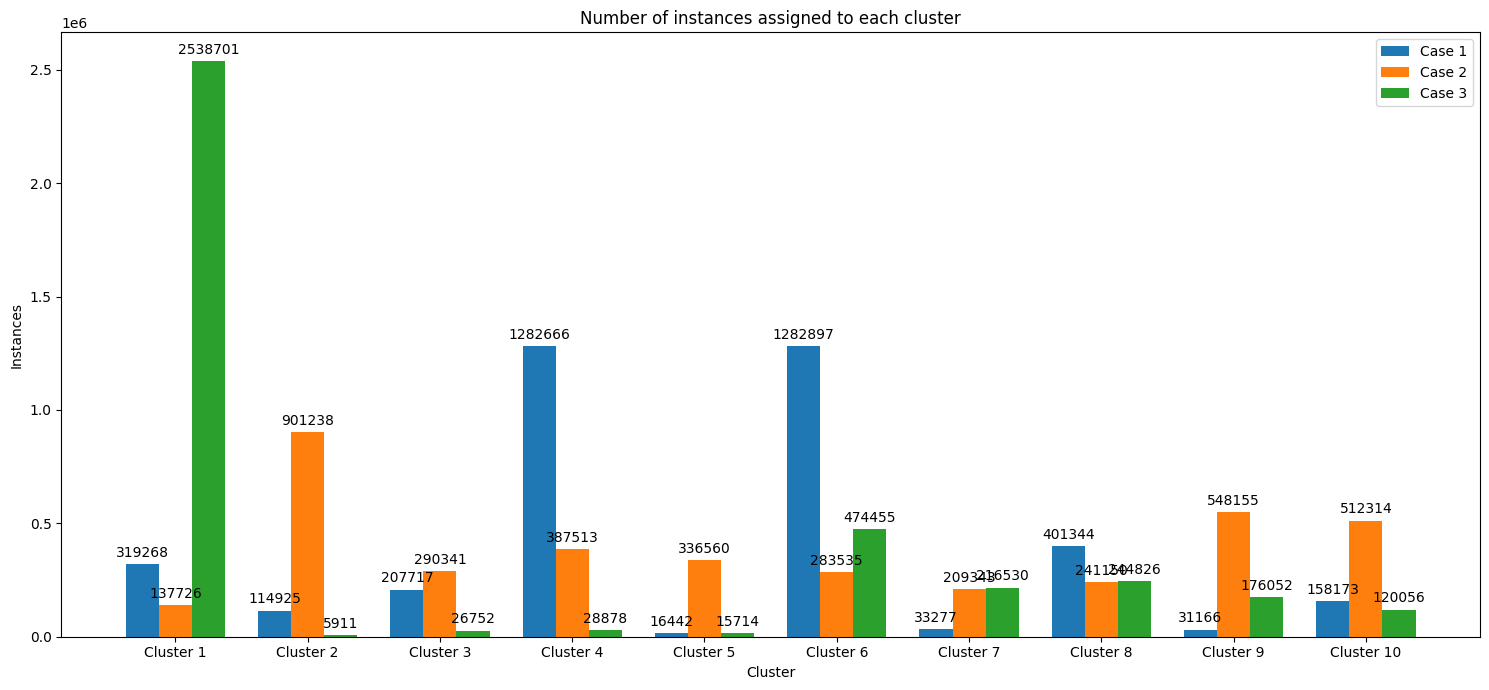

In [6]:

# Data
instances1 = [319268, 114925, 207717, 1282666, 16442, 1282897, 33277, 401344, 31166, 158173]
instances2 = [137726, 901238, 290341, 387513, 336560, 283535, 209343, 241150, 548155, 512314]
instances3 = [2538701, 5911, 26752, 28878, 15714, 474455, 216530, 244826, 176052, 120056]

# Setting up the figure and axes for the plot
fig, ax = plt.subplots(figsize=(15, 7))

# The x locations for the groups
ind = np.arange(len(instances1))  
width = 0.25  # the width of the bars

# Plotting each of the instance groups
bars1 = ax.bar(ind - width, instances1, width, label='Case 1')
bars2 = ax.bar(ind, instances2, width, label='Case 2')
bars3 = ax.bar(ind + width, instances3, width, label='Case 3')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Cluster')
ax.set_ylabel('Instances')
ax.set_title('Number of instances assigned to each cluster')
ax.set_xticks(ind)
ax.set_xticklabels([f'Cluster {i}' for i in range(1, 11)])
ax.legend()

# Function to attach a label above each bar, showing its height
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

fig.tight_layout()

plt.show()

## Instance to cluster distance for rowwise norm

In [6]:
def km(X):
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(X)

    # The total inertia (sum of squared distances to the closest centroid)
    total_distance = kmeans.inertia_
    print(f"Total distance from instances to centroids: {total_distance}")

    # If you're interested in the individual distances or performing further analysis
    # You can calculate the distance of each instance to its centroid
    # Find the cluster centers
    centroids = kmeans.cluster_centers_

    # Assign each instance to its closest centroid and calculate the distance
    distances = np.min(euclidean_distances(X, centroids), axis=1)
    distances2 = np.sum(np.square(distances))
    
    print(f"Total distance from instances to centroids (2): {distances2}")

In [4]:
recx = np.load("/home/carol/NaroNet-main/EXP3/IDEC-toy/results/embs/reconstructed_x.npy")
x = np.load("/home/carol/NaroNet-main/EXP3/ConcInp.npy")

In [7]:
km(x)

/home/carol/anaconda3/envs/anotherone/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total distance from instances to centroids: 946146.0147114858
Total distance from instances to centroids (2): 946146.0147114891


In [8]:
km(recx)

/home/carol/anaconda3/envs/anotherone/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total distance from instances to centroids: 541023.4375
Total distance from instances to centroids (2): 541025.4375
